In [3]:
# Author: Hassan Ali
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading dataset 
df = pd.read_csv('nndb_flat.csv')
# Dropping unneeded columns 
df = df.drop(columns=['ID', 'CommonName', 'MfgName', 'ScientificName'])

# Factorizing  'FoodGroup' column to convert it into numerical labels for analysis
labels, uniques = pd.factorize(df['FoodGroup'])
# Updating the 'FoodGroup' column in the dataframe with its numerical labels
df['FoodGroup'] = labels

# Prepare the feature matrix 'X_' by dropping non-feature columns, keeping numerical data for PCA
X_ = df.drop(columns=['FoodGroup', 'ShortDescrip', 'Descrip']).values
# Assigning 'FoodGroup' column as the target variable 'y'
y = df['FoodGroup']

# Standardizing features to have mean=0 and variance=1, which is a requirement for PCA
X = StandardScaler().fit_transform(X_)

# Initializing PCA without specifying the number of components, meaning all components are kept (n_components=0)
pca = PCA()

# Fitting PCA on the standardized data and transform it to get the principal components
X_r = pca.fit_transform(X)

# Constructing a Scree plot to visualize the percentage of variance explained by each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

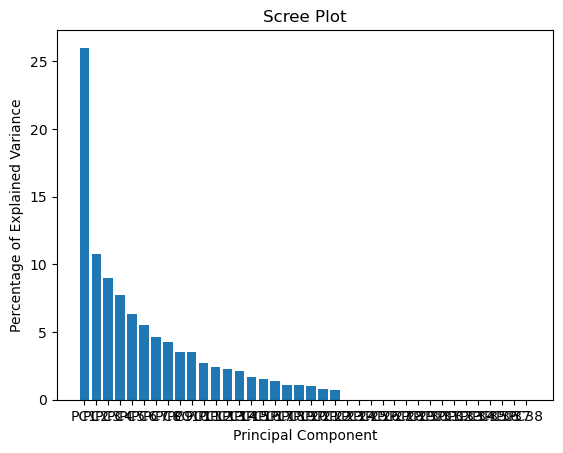

In [4]:
# Plotting a bar graph with principal components on the x-axis and the explained variance on the y-axis
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()  

In [5]:
# Printing the explained variance ratio of all principal components
print('explained variance ratio: %s' % str(pca.explained_variance_ratio_))

explained variance ratio: [2.59701663e-01 1.08282045e-01 9.01901069e-02 7.71686623e-02
 6.26669880e-02 5.50885569e-02 4.58571468e-02 4.28351812e-02
 3.49009486e-02 3.47818607e-02 2.72411983e-02 2.38442218e-02
 2.30500724e-02 2.06378024e-02 1.71529594e-02 1.50411444e-02
 1.38055218e-02 1.14859027e-02 1.10080361e-02 9.96838044e-03
 8.42122159e-03 6.77049235e-03 9.98874240e-05 3.08987617e-17
 2.52295356e-17 1.90556857e-17 1.00550558e-17 8.03562399e-18
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


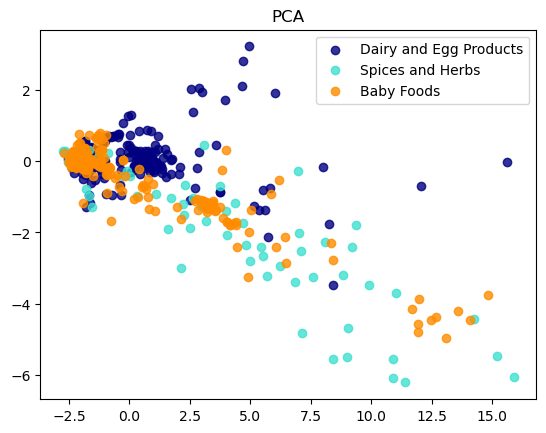

In [6]:
# Defining colors for plotting the different classes
colors = ['navy', 'turquoise', 'darkorange']
# Extracting  unique names of the food groups for labeling
target_names = uniques
# Creating a new figure for plotting
plt.figure()

# Plotting each class in 2D space after LDA transformation
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
   plt.scatter(X_r[y == i, 0], X_r[y == i, 1], alpha=.8, color=color,
               label=target_name)

# Addding legend with best location, no shadow, and one scatter point in legend entries
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA')
plt.show()

In [ ]:
# PCA Scatter Plot Observations
# There are three distinct groups for Dairy and Egg Products, Spices and Herbs, and Baby Foods.
# Egg and Dairy Products are on the left side, while Baby Foods are primarily on the right and lower part of the plot.
# Herbs and Spices are shared from the mid-point to the upper half of the plot.
# Some similarity between the groups indicates that the PCA fails to fully differentiate the categories.
# Spread means the first principal component accounts for more variance than the second.